# Contents

## 01 Import libraries and data

## 02 Data preprocessing

### 02.1 Drop non-numerical columns

### 02.2 Normalise data

### 02.3 Identify number of clusters

## 03 K-means clustering I

### 03.1 Create clusters

### 03.2 Add clusters to original df

## 04 Visualise clustered data I

## 05 K-means clustering II

## 06 Visualise clustered data II

## 07 K-means clustering III

## 08 Visualise clustered data III

## 09 Export dataframe

# 01 Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pylab as pl

In [2]:
# Ensure graphs are displayed in script without being called
%matplotlib inline

In [3]:
# Define path variable for data import
path = r'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/02_Data/02_Prepared data'

In [4]:
# Import data
df = pd.read_pickle(os.path.join(path, '2023-05-28_df.pkl'))

In [5]:
# Get dimensions of df
df.shape

(1665722, 19)

In [6]:
# Get variables and datatypes in df
df.dtypes

borough_code                              object
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
easement                                  object
building_class_at_present                 object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_price_flag                           object
borough_name                              object
sale_price_cat                            object
dtype: object

In [7]:
# Inspect head of df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,high
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,zero
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,high
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,zero


# 02 Data preprocessing

To prepare for clustering with the k-means algorithm, all non-numerical columns will be removed. Furthermore, the remaining numerical variables will be normalised (normalisation is used as it is known that the data is highly skewed).

## 02.1 Drop non-numerical columns

In [8]:
# Create list of columns to drop
drop_cols = ['borough_code', 'neighborhood', 'building_class_category', 'tax_class_at_present', 'easement', 'building_class_at_present', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_price_flag', 'borough_name', 'sale_price_cat']

# Dropping non-numerical columns
df_num = df.drop(columns = drop_cols)

In [9]:
# Get dimensions of df_num
df_num.shape

(1665722, 7)

In [10]:
# Get descpriptive statistics of df_num
df_num.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price
count,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06
mean,2.509923e+00,2.403853e-01,2.759210e+00,3.710365e+03,4.272111e+03,1.948715e+03,9.438209e+05
std,3.442822e+01,7.740843e+00,3.538551e+01,2.959178e+05,4.246420e+04,3.367233e+01,1.158814e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.648000e+03,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.925000e+03,0.000000e+00
50%,1.000000e+00,0.000000e+00,1.000000e+00,1.980000e+03,1.404000e+03,1.940000e+03,3.500000e+05
75%,2.000000e+00,0.000000e+00,2.000000e+00,2.900000e+03,2.430000e+03,1.969000e+03,6.800000e+05
max,2.081100e+04,4.964000e+03,2.081100e+04,2.147557e+08,1.496215e+07,2.022000e+03,4.111112e+09


## 02.2 Normalise data

In [11]:
# Normalise data
# Create normalisation object
scaler = MinMaxScaler()

# Fit df onto object
df_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns, index=df_num.index)

# Print normalised df
print(df_norm)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048          0.000000     0.000048          0.000017   
1                 0.000048          0.000000     0.000048          0.000036   
2                 0.000048          0.000000     0.000048          0.000062   
3                 0.000048          0.000000     0.000048          0.000038   
4                 0.000048          0.000000     0.000048          0.000049   
...                    ...               ...          ...               ...   
1916225           0.000048          0.000000     0.000048          0.000009   
1916243           0.000048          0.000000     0.000048          0.000009   
1916245           0.000048          0.000000     0.000048          0.000009   
1916253           0.000048          0.000000     0.000048          0.000009   
1916259           0.000000          0.000201     0.000048          0.000045   

         gross_square_feet  year_built  sale_price 

In [12]:
# Inspect head of df_norm
df_norm.head(5)

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price
0,0.000048,0.0,0.000048,0.000017,0.000061,0.946524,0.000186
1,0.000048,0.0,0.000048,0.000036,0.000152,0.887701,0.000267
2,0.000048,0.0,0.000048,0.000062,0.000314,0.901070,0.000000
3,0.000048,0.0,0.000048,0.000038,0.000102,0.860963,0.000216
4,0.000048,0.0,0.000048,0.000049,0.000152,0.887701,0.000000


## 02.3 Identify number of clusters

In [13]:
# Define range of potential number of clusters
num_cl = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

# Apply k-means algorithm to get score list
score = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]

# Print score list
score

[-13545.469078809972,
 -3899.885203356631,
 -1493.8227640721018,
 -876.5811140219607,
 -614.3766347113321,
 -466.6776881942601,
 -372.14485171633845,
 -319.3720520892848,
 -244.03817295695893]

Text(0, 0.5, 'Score')

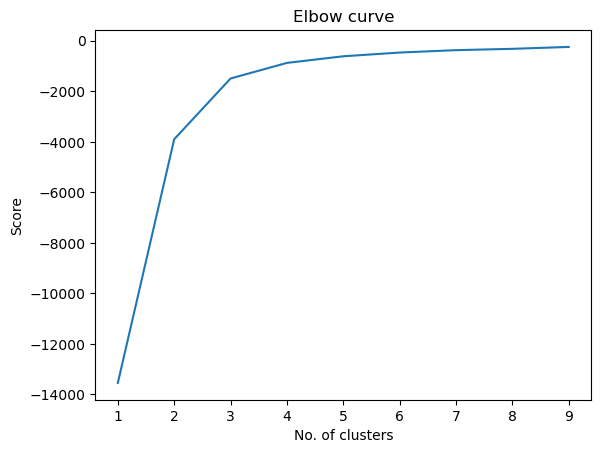

In [14]:
# Plot elbow curve
# Create plot
pl.plot(num_cl, score)

# Add axis label and title
pl.title('Elbow curve')
pl.xlabel('No. of clusters')
pl.ylabel('Score')

As it is a bit difficult to be sure whether the elbow is at 3 or 4, the elbow method will be repeated with a reduced range of potential number of clusters.

In [15]:
# Define range of potential number of clusters
num_cl = range(1,6)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_cl]

# Apply k-means algorithm to get score list
score = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]

# Print score list
score

[-13545.469078809972,
 -3899.885203356631,
 -1493.8227640721018,
 -876.5811140219607,
 -614.3530174763666]

Text(0, 0.5, 'Score')

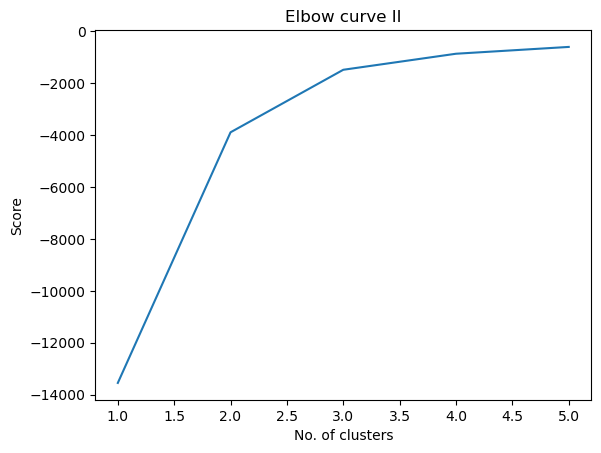

In [16]:
# Plot elbow curve
# Create plot
pl.plot(num_cl, score)

# Add axis label and title
pl.title('Elbow curve II')
pl.xlabel('No. of clusters')
pl.ylabel('Score')

From the first elbow curve, it is clear that the curve starts to flatten out at 3. However, only from 4 on does it appear to be really flat. Therefore, I plotted a second elbow graph based on a reduced potential number of clusters. The second graph confirms that 3 is the most reasonable number of clusters to run the k-means algorithm on the dataset. 

# 03 K-means clustering I

## 03.1 Create clusters

In [17]:
# Create k-means object
kmeans = KMeans(n_clusters=3)

# Fit k-means object to dataframe
kmeans.fit(df_norm)

KMeans(n_clusters=3)

In [18]:
# Create new column indicating cluster
df_norm['cluster'] = kmeans.fit_predict(df_norm)

In [19]:
# Check addition of new column
df_norm.head(5)

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,cluster
0,0.000048,0.0,0.000048,0.000017,0.000061,0.946524,0.000186,2
1,0.000048,0.0,0.000048,0.000036,0.000152,0.887701,0.000267,2
2,0.000048,0.0,0.000048,0.000062,0.000314,0.901070,0.000000,2
3,0.000048,0.0,0.000048,0.000038,0.000102,0.860963,0.000216,1
4,0.000048,0.0,0.000048,0.000049,0.000152,0.887701,0.000000,2


In [20]:
# Count number of observations per cluster
df_norm['cluster'].value_counts()

0    774673
1    533604
2    357445
Name: cluster, dtype: int64

## 03.2 Add clusters to original df

In [21]:
# Extract cluster column
extracted_col = df_norm['cluster']

# Add extracted column to original df
df = df.join(extracted_col)

# Print head of df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat,cluster
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium,2
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,high,2
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,zero,2
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,high,1
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,zero,2


# 04 Visualise clustered data I

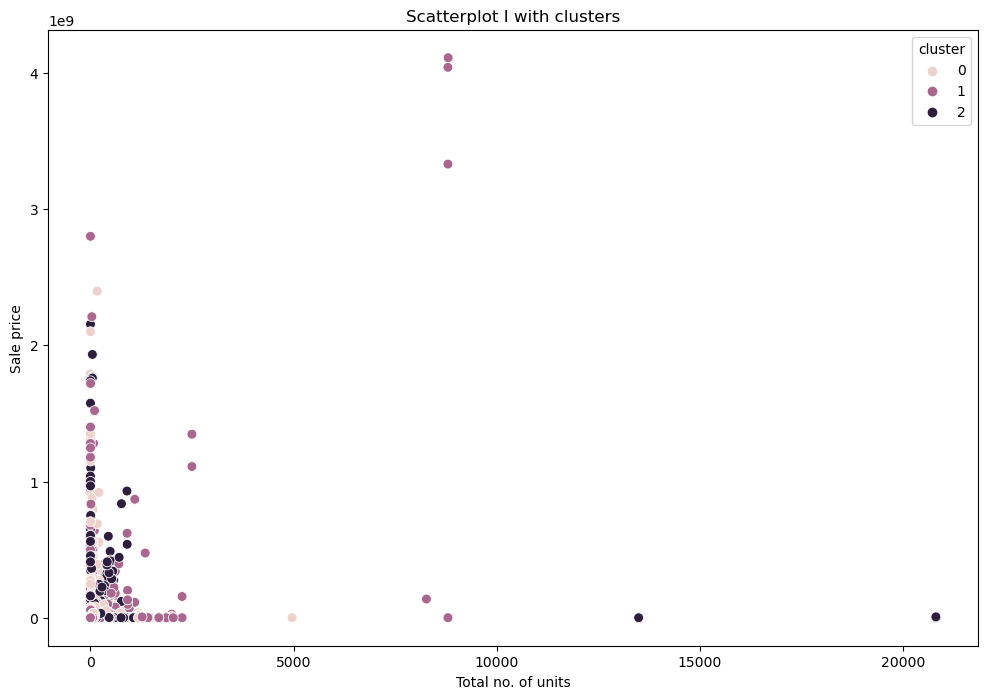

In [22]:
# Scatterplot of total_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot I with clusters')
plt.xlabel('Total no. of units')
plt.ylabel('Sale price')

# Change current directory before saving visual
os.chdir('/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/04_Analysis/01 Visuals')

# Save visual
plt.savefig('2023-06-18_scatter_totunit-price-clust.png')

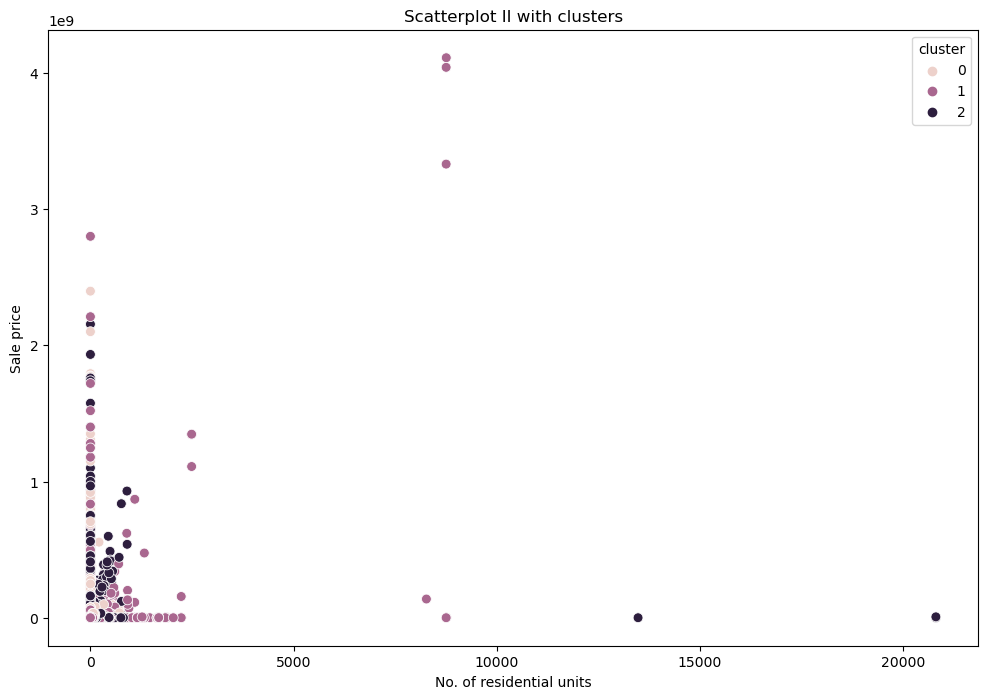

In [23]:
# Scatterplot of residential_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['residential_units'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot II with clusters')
plt.xlabel('No. of residential units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_residunit-price-clust.png')

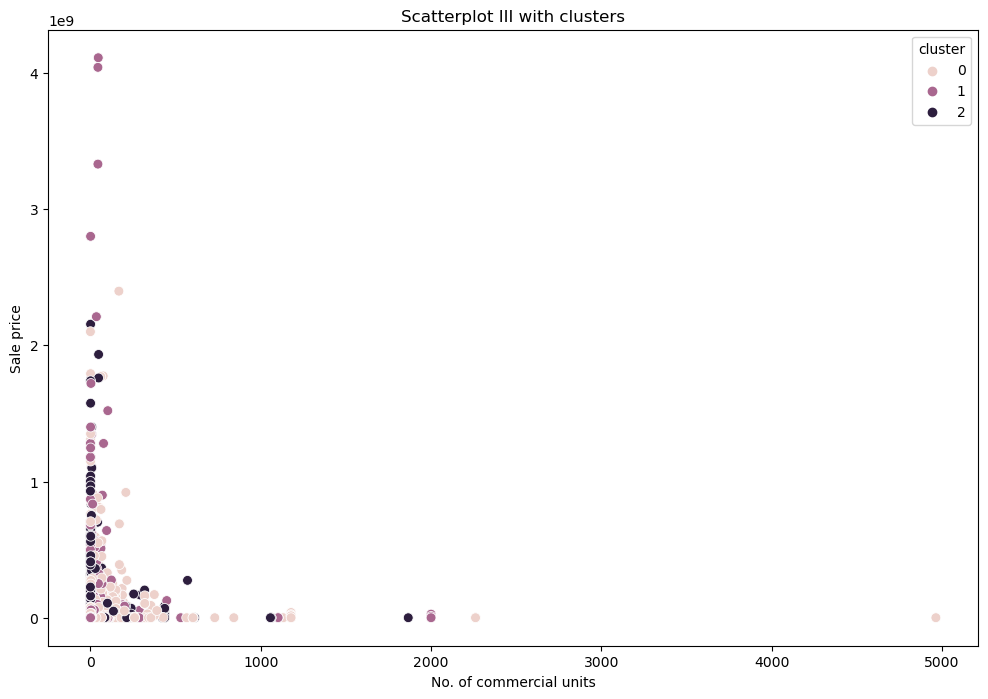

In [24]:
# Scatterplot of commercial_units and sale price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['commercial_units'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot III with clusters')
plt.xlabel('No. of commercial units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_communit-price-clust.png')

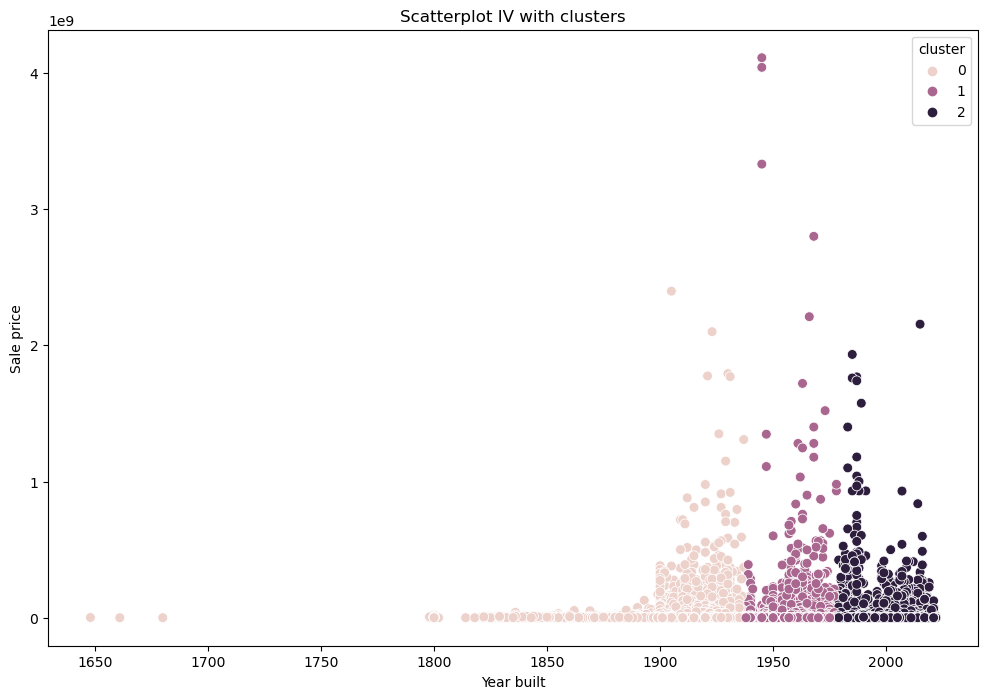

In [25]:
# Scatterplot of year_built and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year_built'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot IV with clusters')
plt.xlabel('Year built')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_year-price-clust.png')

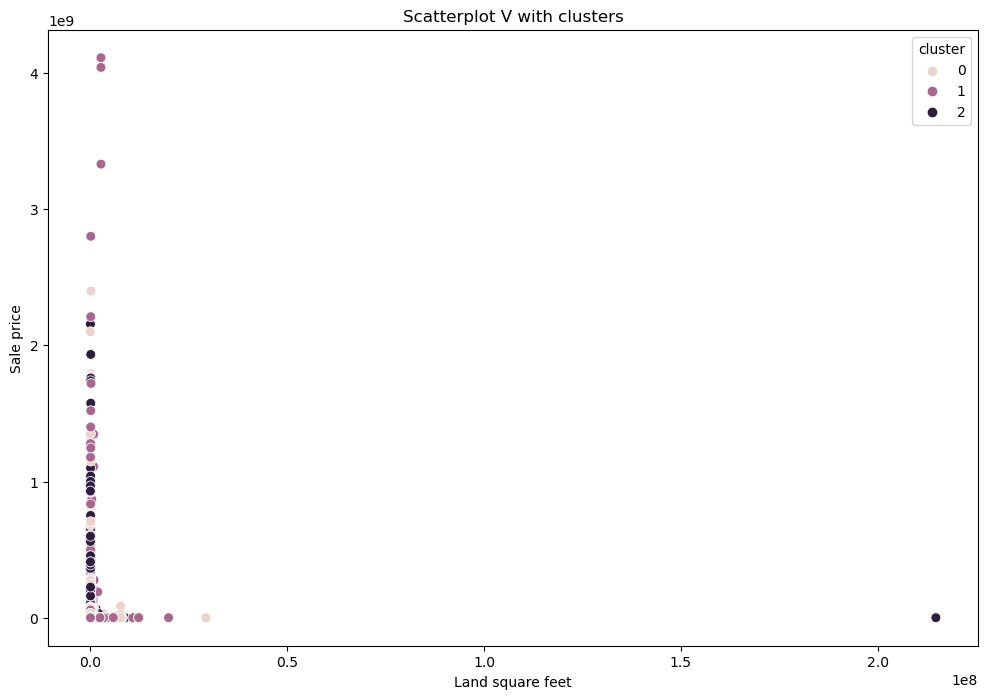

In [26]:
# Scatterplot with land_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['land_square_feet'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot V with clusters')
plt.xlabel('Land square feet')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_ldsqft-price-clust.png')

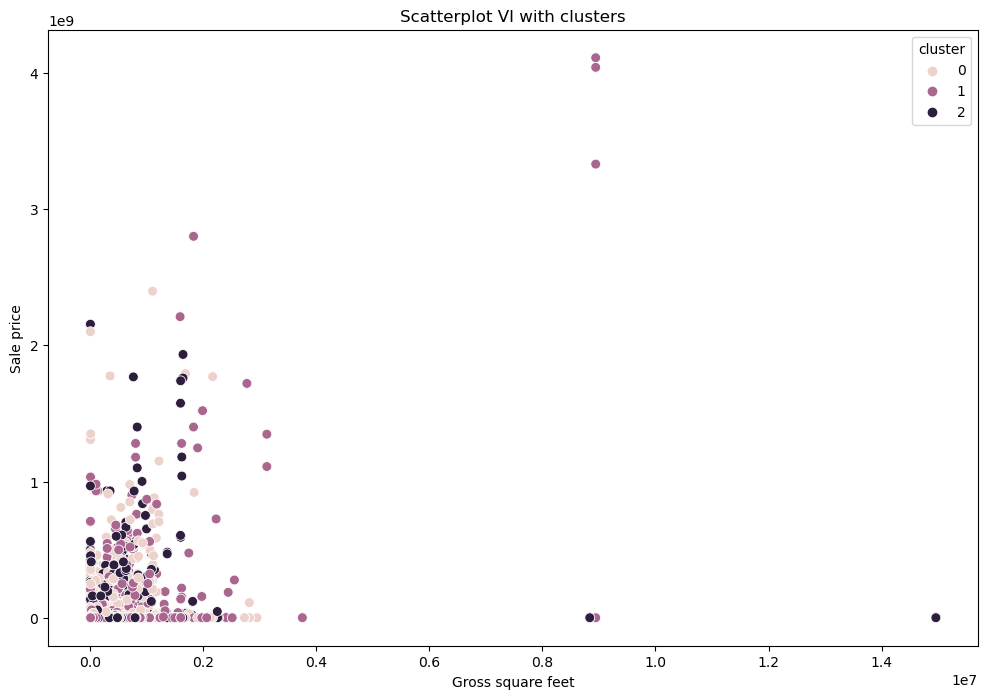

In [27]:
# Scatterplot with gross_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gross_square_feet'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VI with clusters')
plt.xlabel('Gross square feet')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_grsqft-price-clust.png')

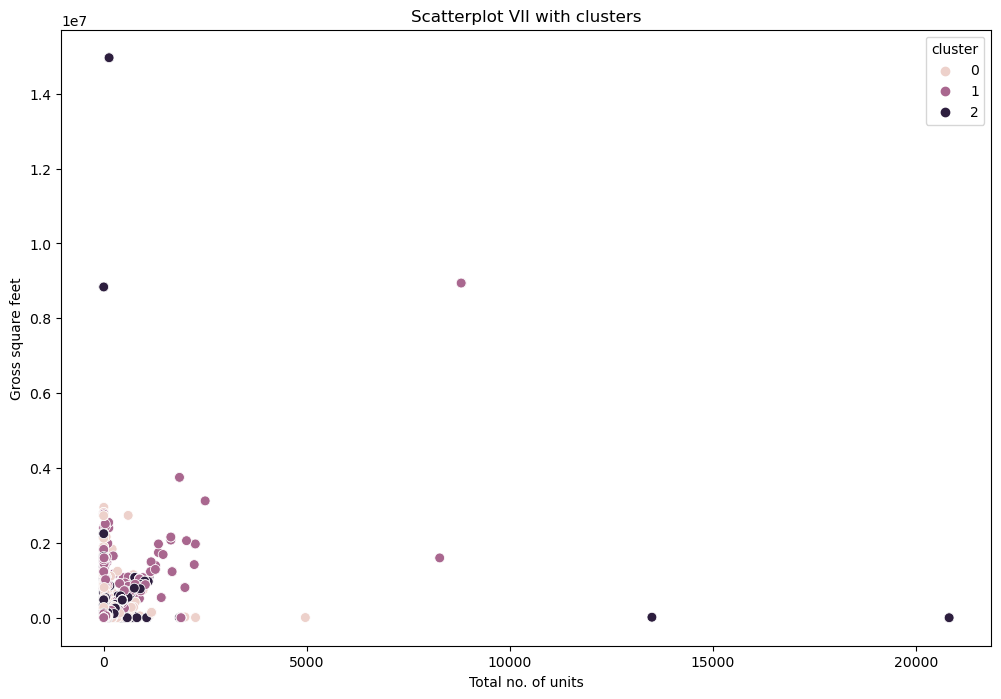

In [28]:
# Scatterplot with total_units and gross_square_feet
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['gross_square_feet'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VII with clusters')
plt.xlabel('Total no. of units')
plt.ylabel('Gross square feet')

# Save visual
plt.savefig('2023-06-18_scatter_totunit-grsqft-clust.png')

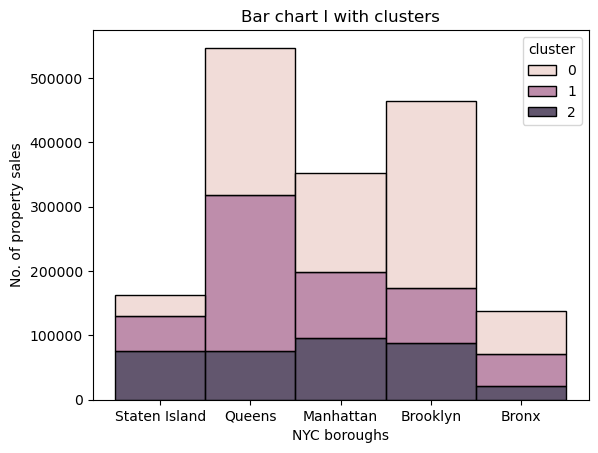

In [29]:
# Bar chart of properties per borough and cluster
# Create chart
sns.histplot(df, x='borough_name', hue='cluster', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart I with clusters')
plt.xlabel('NYC boroughs')
plt.ylabel('No. of property sales')

# Save visual
plt.savefig('2023-06-18_bar_borough-clust.png')

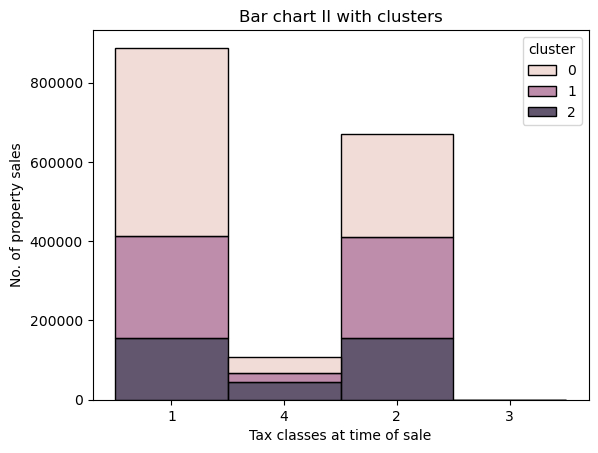

In [30]:
# Bar chart of properties per tax_class_at_sale and cluster
# Create chart
sns.histplot(df, x='tax_class_at_time_of_sale', hue='cluster', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart II with clusters')
plt.xlabel('Tax classes at time of sale')
plt.ylabel('No. of property sales')

# Save visual
plt.savefig('2023-06-18_bar_taxcl-clust.png')

The only way the clusters make sense is related to a properties age (cf. scatterplot IV). In all other visualisations of variable relationships, the clusters do not form a recognisable pattern. After calculation of descriptive statistics for the current clusters, I will re-run the k-means algorithm to cluster the data without taking property age into account. 

In [31]:
# Calculating descriptive statistics for clusters
df.groupby('cluster').agg({'residential_units': ['min', 'max', 'mean', 'median'], 'commercial_units': ['min', 'max', 'mean', 'median'], 'total_units': ['min', 'max', 'mean', 'median'], 'land_square_feet': ['min', 'max', 'mean', 'median'], 'gross_square_feet': ['min', 'max', 'mean', 'median'], 'year_built': ['min', 'max', 'mean', 'median'], 'sale_price': ['min', 'max', 'mean', 'median']})

residential_units                         commercial_units        \
                      min    max      mean median              min   max   
cluster                                                                    
0                       0    966  2.666355    1.0                0  4964   
1                       0   8764  2.003795    1.0                0  2000   
2                       0  20811  2.926459    1.0                0  1866   

                         total_units         ... gross_square_feet          \
             mean median         min    max  ...              mean  median   
cluster                                      ...                             
0        0.304964    0.0           0   4964  ...       3720.220808  1800.0   
1        0.143826    0.0           0   8812  ...       3252.648325  1296.0   
2        0.244575    0.0           0  20811  ...       6990.079598  1346.0   

        year_built                            sale_price                \
               min   max         mean  median        min           max   
cluster                                                                  
0             1648  1937  1919.443510  1920.0        0.0  2.397502e+09   
1             1938  1978  1955.876305  1955.0        0.0  4.111112e+09   
2             1979  2022  2001.464981  2005.0        0.0  2.155000e+09   

                                 
                 mean    median  
cluster                          
0        9.808951e+05  365000.0  
1        7.103618e+05  285000.0  
2        1.211986e+06  427450.0  

[3 rows x 28 columns]

In [32]:
# Change pandas column display options
pd.set_option('display.max_columns', None)

In [33]:
# Calculating descriptive statistics for clusters
df.groupby('cluster').agg({'residential_units': ['min', 'max', 'mean', 'median'], 'commercial_units': ['min', 'max', 'mean', 'median'], 'total_units': ['min', 'max', 'mean', 'median'], 'land_square_feet': ['min', 'max', 'mean', 'median'], 'gross_square_feet': ['min', 'max', 'mean', 'median'], 'year_built': ['min', 'max', 'mean', 'median'], 'sale_price': ['min', 'max', 'mean', 'median']})

residential_units                         commercial_units        \
                      min    max      mean median              min   max   
cluster                                                                    
0                       0    966  2.666355    1.0                0  4964   
1                       0   8764  2.003795    1.0                0  2000   
2                       0  20811  2.926459    1.0                0  1866   

                         total_units                         land_square_feet  \
             mean median         min    max      mean median              min   
cluster                                                                         
0        0.304964    0.0           0   4964  2.973557    2.0              0.0   
1        0.143826    0.0           0   8812  2.154879    1.0              0.0   
2        0.244575    0.0           0  20811  3.196827    1.0              0.0   

                                          gross_square_feet              \
                 max         mean  median               min         max   
cluster                                                                   
0         29305534.0  2865.040531  2052.0               0.0   2949024.0   
1         19850400.0  4227.127913  1975.0               0.0   8942176.0   
2        214755710.0  4770.955602  1687.0               0.0  14962152.0   

                             year_built                            sale_price  \
                mean  median        min   max         mean  median        min   
cluster                                                                         
0        3720.220808  1800.0       1648  1937  1919.443510  1920.0        0.0   
1        3252.648325  1296.0       1938  1978  1955.876305  1955.0        0.0   
2        6990.079598  1346.0       1979  2022  2001.464981  2005.0        0.0   

                                               
                  max          mean    median  
cluster                                        
0        2.397502e+09  9.808951e+05  365000.0  
1        4.111112e+09  7.103618e+05  285000.0  
2        2.155000e+09  1.211986e+06  427450.0

Interestingly, these descriptive statistics show that the maximum number of residential units increases from clusters 0 to 2 whereas the maximum number of commercial units drops. For the total number of units, the trend follows that of the residential units. Mean and median for these three variables differ, but not much. The mimimum is 0 for all three variables.

For property size measures in land and gross square feet, the minimum is equally 0 for all clusters. While the maximum increases from clusters 0 to 2 for gross square feet, the maximum in land square feet is lower for cluster 1 than for cluster 0. 

Year built is the only variable where clusters can be meaningfully interpreted: cluster 0 are old properties (1648-1937, cluster 2 are medium-age (1938-1978), and cluster 1 are new properties (1979-2022).

When looking at sale_price it becomes clear that the highest prices are paid for the newest buildings, followed by old buildings. Medium-aged buildings range in between. How come that some old buildings yield very high prices (cf. mean and median sale_price for cluster 0) is an interesting fact that could be further looked at in the analysis pipeline.

Before re-running the k-means algorithm without taking year_built into account, the column 'cluster' and its values will be renamed. 

In [34]:
# Rename column 'cluster'
df.rename(columns= {'cluster' : 'age_cluster'}, inplace=True)

In [35]:
# Replace cluster numbers with names
df.loc[df['age_cluster'] ==0, 'age_cluster'] = 'old building'
df.loc[df['age_cluster'] ==1, 'age_cluster'] = 'new building'
df.loc[df['age_cluster'] ==2, 'age_cluster'] = 'medium-age building'

In [36]:
# Check df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat,age_cluster
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium,medium-age building
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,high,medium-age building
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,zero,medium-age building
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,high,new building
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,zero,medium-age building


# 05 K-means clustering II

In [37]:
# Create list of columns to drop from df
drop_cols2 = ['borough_code', 'neighborhood', 'building_class_category', 'tax_class_at_present', 'easement', 'building_class_at_present', 'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_price_flag', 'borough_name', 'sale_price_cat', 'age_cluster']

# Dropping non-numerical columns incl. year_built
df_num2 = df.drop(columns = drop_cols2)

In [38]:
# Get dimensions of df_num2
df_num2.shape

(1665722, 6)

In [39]:
# Normalise data
# Create normalisation object
scaler = MinMaxScaler()

# Fit df onto object
df_norm2 = pd.DataFrame(scaler.fit_transform(df_num2), columns=df_num2.columns, index=df_num2.index)

# Print normalised df
print(df_norm2)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048          0.000000     0.000048          0.000017   
1                 0.000048          0.000000     0.000048          0.000036   
2                 0.000048          0.000000     0.000048          0.000062   
3                 0.000048          0.000000     0.000048          0.000038   
4                 0.000048          0.000000     0.000048          0.000049   
...                    ...               ...          ...               ...   
1916225           0.000048          0.000000     0.000048          0.000009   
1916243           0.000048          0.000000     0.000048          0.000009   
1916245           0.000048          0.000000     0.000048          0.000009   
1916253           0.000048          0.000000     0.000048          0.000009   
1916259           0.000000          0.000201     0.000048          0.000045   

         gross_square_feet  sale_price  
0         

In [40]:
# Inspect head of df_norm2
df_norm2.head(5)

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,sale_price
0,0.000048,0.0,0.000048,0.000017,0.000061,0.000186
1,0.000048,0.0,0.000048,0.000036,0.000152,0.000267
2,0.000048,0.0,0.000048,0.000062,0.000314,0.000000
3,0.000048,0.0,0.000048,0.000038,0.000102,0.000216
4,0.000048,0.0,0.000048,0.000049,0.000152,0.000000


In [41]:
# Identify number of clusters
# Define range of potential number of clusters
num_cl2 = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_cl2]

# Apply k-means algorithm to get score list
score2 = [kmeans[i].fit(df_norm2).score(df_norm2) for i in range(len(kmeans))]

# Print score list
score2

[-43.23952000103312,
 -34.34703839165492,
 -28.73475631054405,
 -23.149669029877693,
 -18.379819298515635,
 -15.819703742044023,
 -13.613329888796105,
 -11.601288821024143,
 -9.829580132781224]

Text(0, 0.5, 'Score')

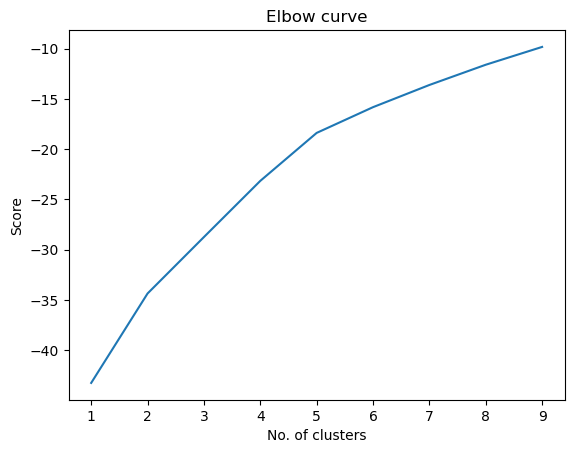

In [42]:
# Plot elbow curve
# Create plot
pl.plot(num_cl2, score2)

# Add axis label and title
pl.title('Elbow curve')
pl.xlabel('No. of clusters')
pl.ylabel('Score')

The number of clusters will be set to 5.

In [43]:
# Create k-means object
kmeans = KMeans(n_clusters=5)

# Fit k-means object to dataframe
kmeans.fit(df_norm2)

KMeans(n_clusters=5)

In [44]:
# Create new column indicating cluster
df_norm2['cluster2'] = kmeans.fit_predict(df_norm2)

In [45]:
# Check addition of new column
df_norm2.head(5)

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,sale_price,cluster2
0,0.000048,0.0,0.000048,0.000017,0.000061,0.000186,0
1,0.000048,0.0,0.000048,0.000036,0.000152,0.000267,0
2,0.000048,0.0,0.000048,0.000062,0.000314,0.000000,0
3,0.000048,0.0,0.000048,0.000038,0.000102,0.000216,0
4,0.000048,0.0,0.000048,0.000049,0.000152,0.000000,0


In [46]:
# Count number of observations per cluster
df_norm2['cluster2'].value_counts()

0    1663054
3       2574
4         82
1          9
2          3
Name: cluster2, dtype: int64

In [47]:
# Add column cluster2 to original dataframe
# Extract cluster column
extracted_col2 = df_norm2['cluster2']

# Add extracted column to original df
df = df.join(extracted_col2)

# Print head of df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat,age_cluster,cluster2
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium,medium-age building,0
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,high,medium-age building,0
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,zero,medium-age building,0
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,high,new building,0
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,zero,medium-age building,0


# 06 Visualise clustered data II

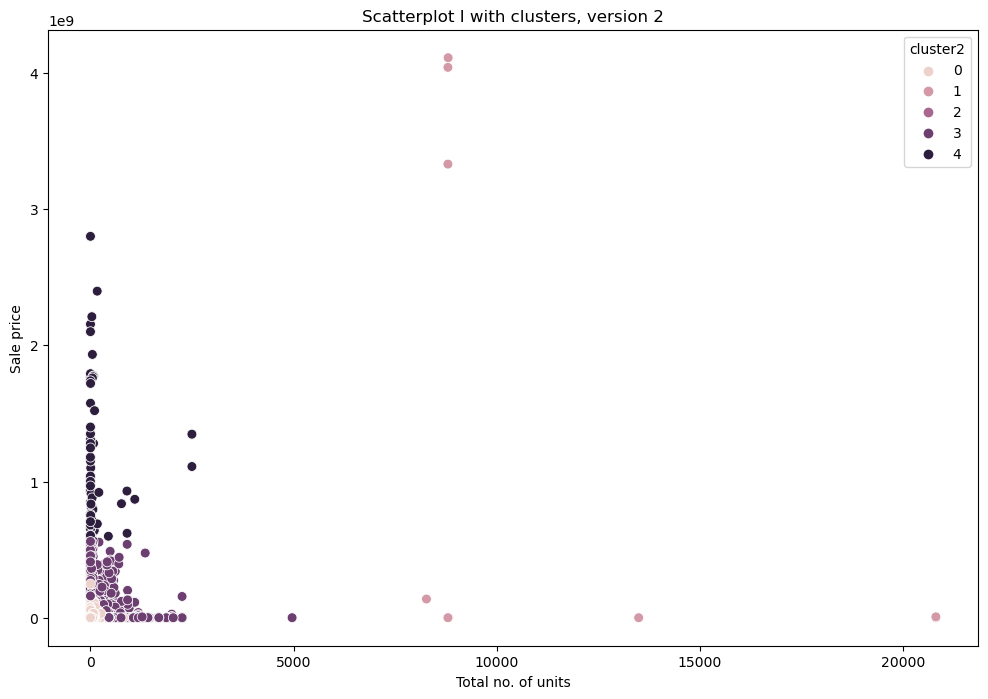

In [48]:
# Scatterplot of total_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot I with clusters, version 2')
plt.xlabel('Total no. of units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_totunit-price-clust_V2.png')

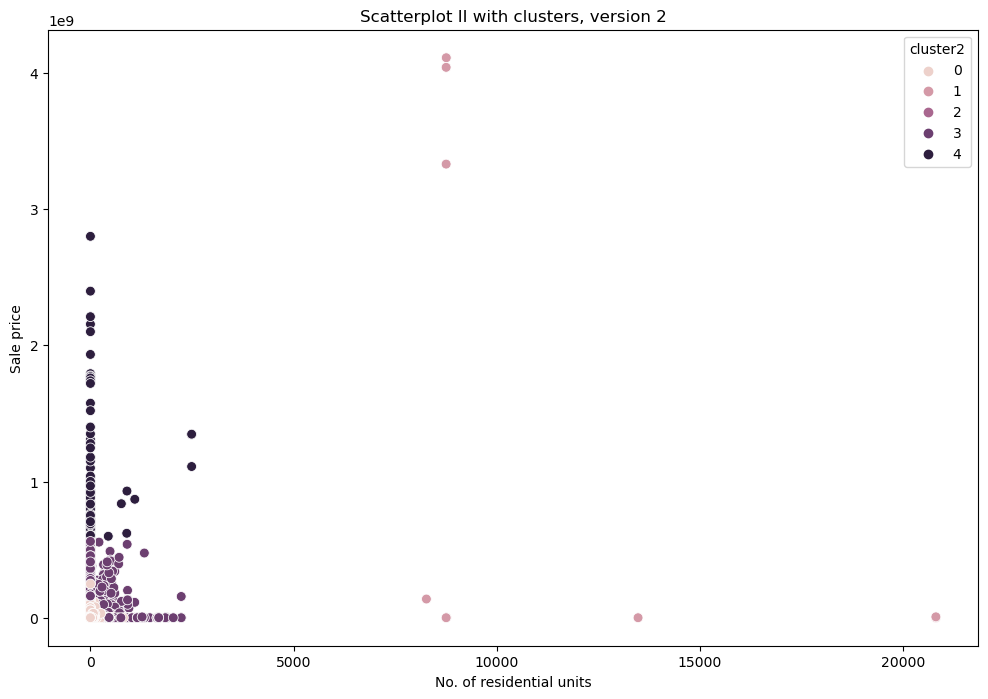

In [49]:
# Scatterplot of residential_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['residential_units'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot II with clusters, version 2')
plt.xlabel('No. of residential units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_residunit-price-clust_V2.png')

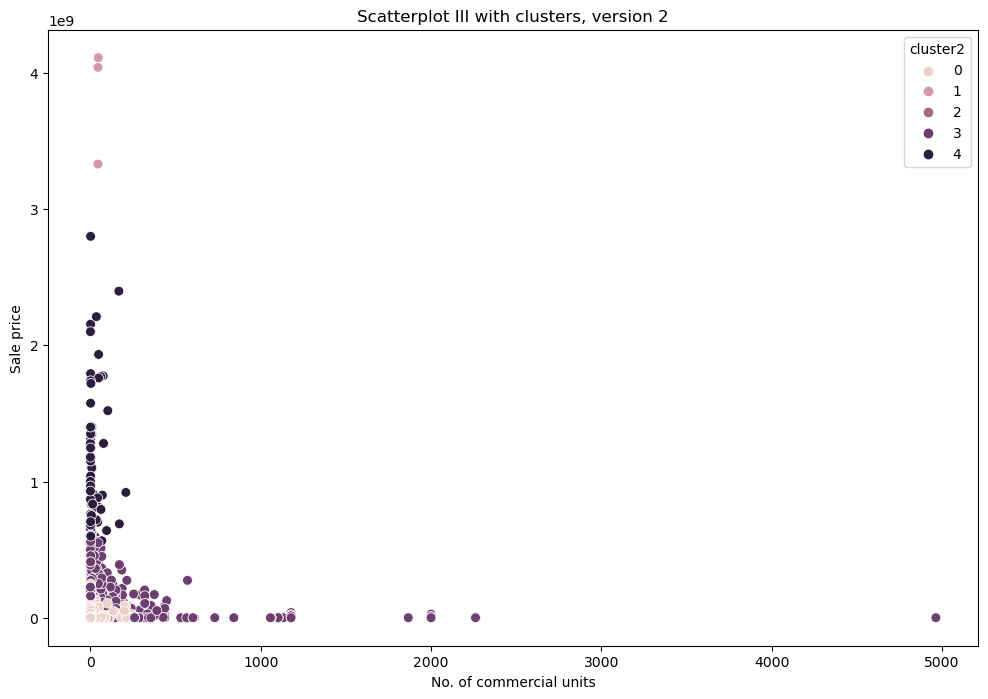

In [50]:
# Scatterplot of commercial_units and sale price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['commercial_units'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot III with clusters, version 2')
plt.xlabel('No. of commercial units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_communit-price-clust_V2.png')

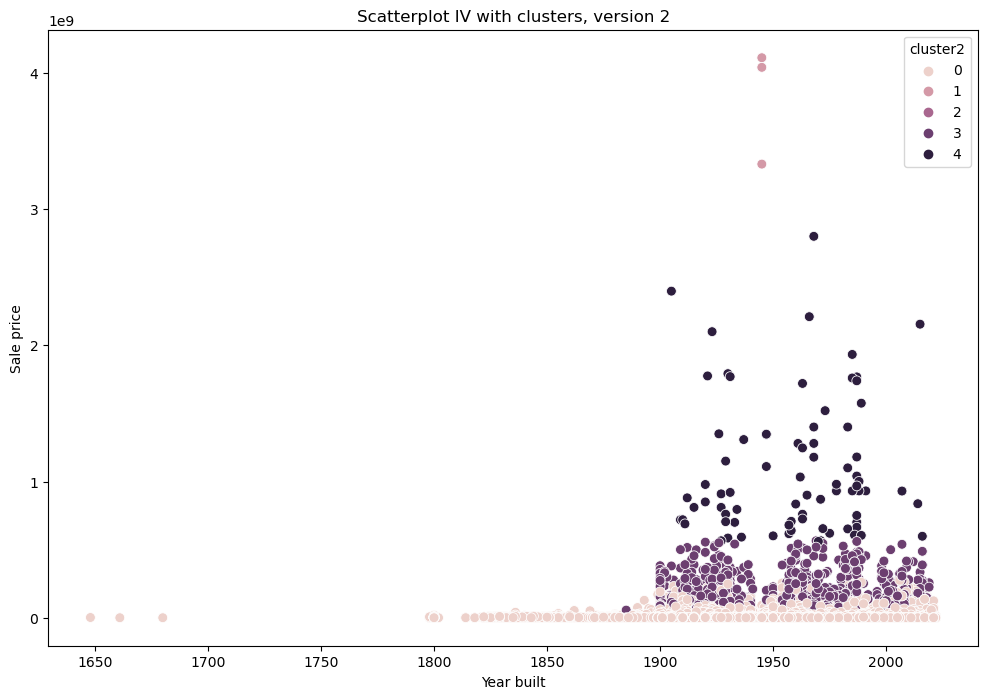

In [51]:
# Scatterplot of year_built and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year_built'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot IV with clusters, version 2')
plt.xlabel('Year built')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_year-price-clust_V2.png')

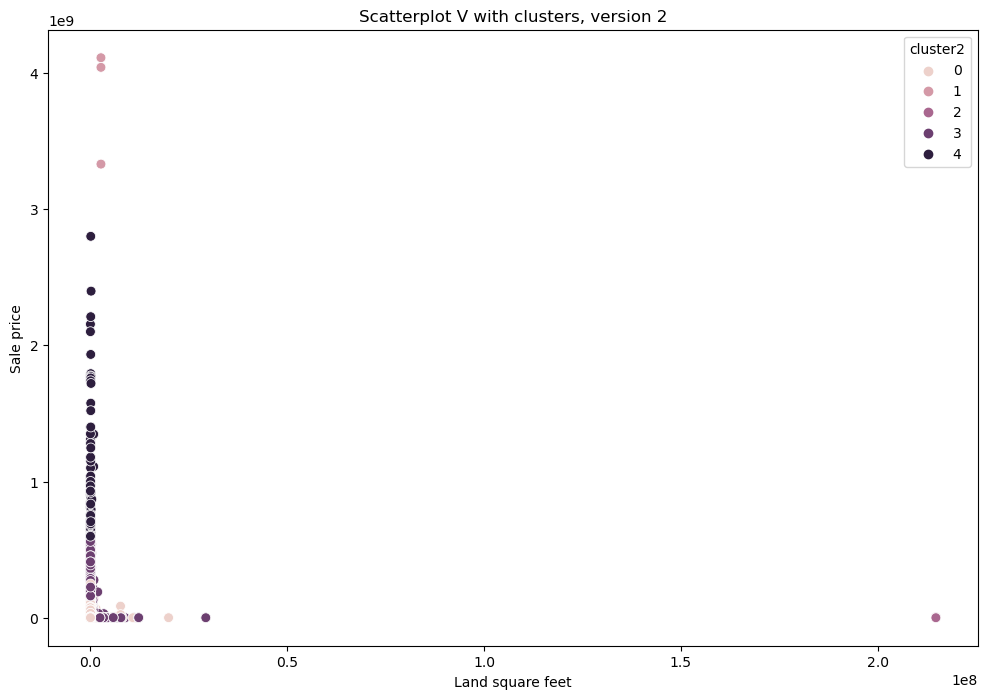

In [52]:
# Scatterplot with land_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['land_square_feet'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot V with clusters, version 2')
plt.xlabel('Land square feet')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_ldsqft-price-clust_V2.png')

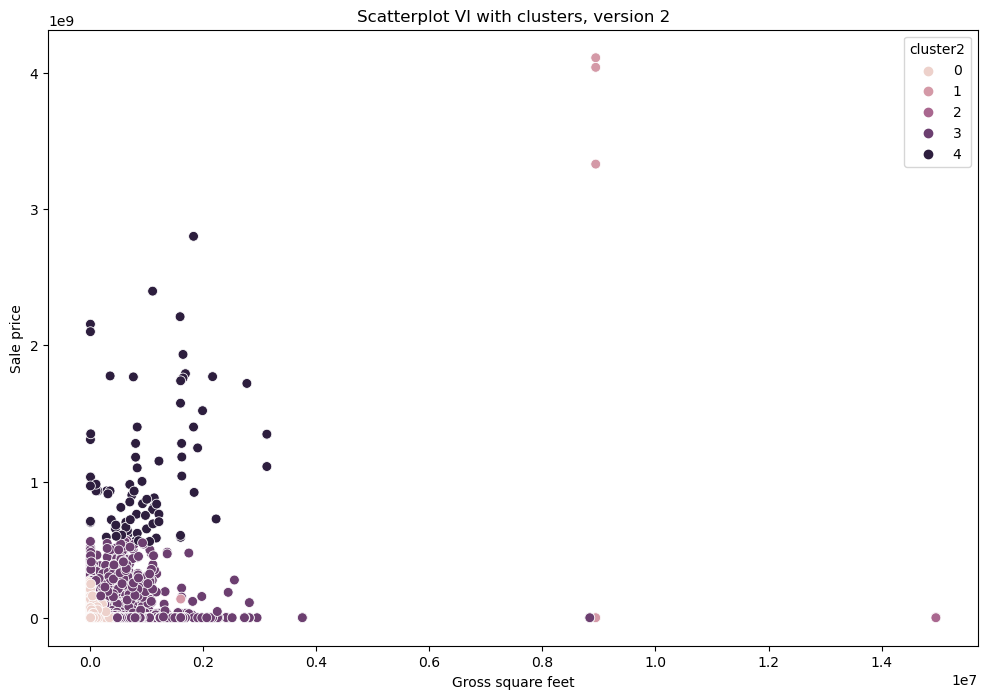

In [53]:
# Scatterplot with gross_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gross_square_feet'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VI with clusters, version 2')
plt.xlabel('Gross square feet')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_grsqft-price-clust_V2.png')

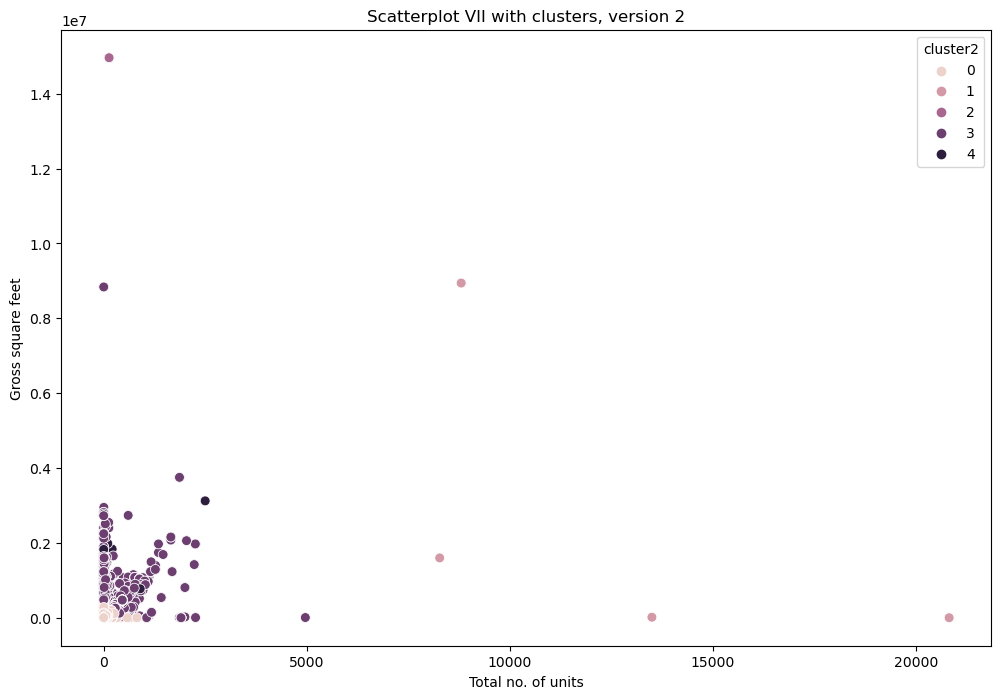

In [54]:
# Scatterplot with total_units and gross_square_feet
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['gross_square_feet'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VII with clusters, version 2')
plt.xlabel('Total no. of units')
plt.ylabel('Gross square feet')

# Save visual
plt.savefig('2023-06-18_scatter_totunit-grsqft-clust_V2.png')

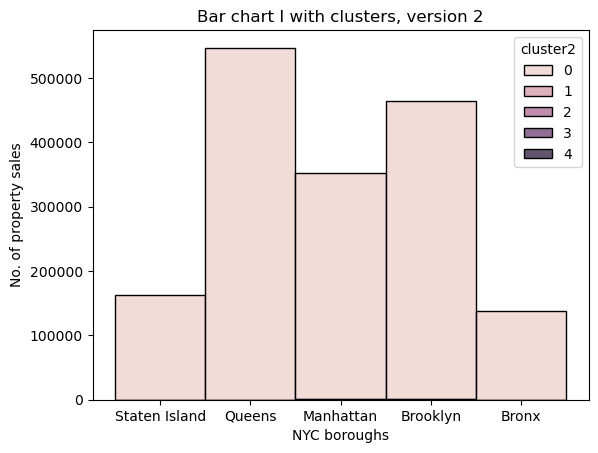

In [55]:
# Bar chart of properties per borough and cluster
# Create chart
sns.histplot(df, x='borough_name', hue='cluster2', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart I with clusters, version 2')
plt.xlabel('NYC boroughs')
plt.ylabel('No. of property sales')

# Save visual
plt.savefig('2023-06-18_bar_borough-clust_V2.png')

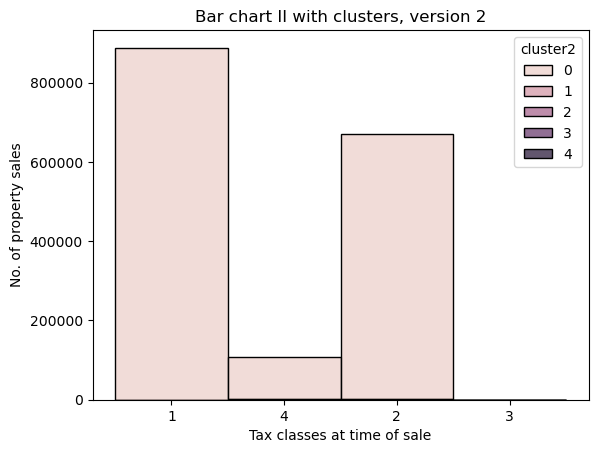

In [56]:
# Bar chart of properties per tax_class_at_sale and cluster
# Create chart
sns.histplot(df, x='tax_class_at_time_of_sale', hue='cluster2', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart II with clusters, version 2')
plt.xlabel('Tax classes at time of sale')
plt.ylabel('No. of property sales')

# Save visual
plt.savefig('2023-06-18_bar_taxcl-clust_V2.png')

Re-running the k-means algorithm seems to cluster observations according to sale price (cf. scatterplot IV) and property size in gross square feet (cf. scatterplot VI). While both variables seems to play an important role, the clustering according to sale prices is more obvious as the data points appear as layers in scatterplot IV.

While the sizes of the clusters were relatively similar in the first clustering process, they are very different in the second clustering process. The stacked bar charts I and II are therefore hardly useful. It might be worth attempting a third clustering process excluding ownership transfers (i.e. sale prices of 0 US$) to see whether this produces any further insights on clusters in the dataset.

In [57]:
# Calculating descriptive statistics for clusters
df.groupby('cluster2').agg({'residential_units': ['min', 'max', 'mean', 'median'], 'commercial_units': ['min', 'max', 'mean', 'median'], 'total_units': ['min', 'max', 'mean', 'median'], 'land_square_feet': ['min', 'max', 'mean', 'median'], 'gross_square_feet': ['min', 'max', 'mean', 'median'], 'year_built': ['min', 'max', 'mean', 'median'], 'sale_price': ['min', 'max', 'mean', 'median']})

residential_units                              commercial_units  \
                       min    max          mean  median              min   
cluster2                                                                   
0                        0    812      2.071992     1.0                0   
1                     8270  20811  11907.000000  8759.0                0   
2                        0      0      0.000000     0.0              133   
3                        0   2235    239.423077   246.0                0   
4                        0   2491    140.987805     0.0                0   

                                  total_units                               \
           max        mean median         min    max          mean  median   
cluster2                                                                     
0          422    0.177166    0.0           0    818      2.258070     1.0   
1           48   26.888889   44.0        8271  20811  11933.888889  8805.0   
2          133  133.000000  133.0         133    133    133.000000   133.0   
3         4964   40.168609    1.0           0   4964    279.594406   272.0   
4          208   21.256098    2.0           0   2498    162.243902     4.0   

         land_square_feet                                          \
                      min          max          mean       median   
cluster2                                                            
0                     0.0   19850400.0  2.762681e+03       1975.0   
1                  2375.0    2675000.0  1.582868e+06    2675000.0   
2             214755710.0  214755710.0  2.147557e+08  214755710.0   
3                     0.0   29305534.0  3.576144e+05      27300.0   
4                     0.0     828650.0  8.458676e+04      42470.0   

         gross_square_feet                                       year_built  \
                       min         max          mean      median        min   
cluster2                                                                      
0                      0.0    398214.0  3.311361e+03      1400.0       1648   
1                      0.0   8942176.0  5.146923e+06   8942176.0       1945   
2               14962152.0  14962152.0  1.496215e+07  14962152.0       1994   
3                      0.0   8837499.0  5.583849e+05    466368.0       1885   
4                      0.0   3122165.0  9.839841e+05    827686.0       1905   

                                      sale_price                              \
           max         mean  median          min           max          mean   
cluster2                                                                       
0         2022  1948.680360  1940.0          0.0  2.750000e+08  7.899598e+05   
1         2012  1969.333333  1945.0          0.0  4.111112e+09  1.291797e+09   
2         1994  1994.000000  1994.0          0.0  3.834460e+06  2.029568e+06   
3         2020  1970.859751  1969.0          0.0  5.650000e+08  6.168579e+07   
4         2016  1960.560976  1964.0  560000000.0  2.800000e+09  1.072999e+09   

                       
               median  
cluster2               
0            350000.0  
1           6500000.0  
2           2254244.0  
3           1375000.0  
4         930500000.0

The results remain difficult to interpret. Even the descriptive statistics for sale_price show no clear stratification of the observations as the minimum sale_price for each cluster is 0. It appears that the mean sale price is decisive for clustering the observations. 

As stated after the first clustering process, it might be worth attempting a third clustering process with all ownership transfers removed from the dataset.

In [58]:
# Rename column 'cluster2'
df.rename(columns= {'cluster2' : 'price_cluster'}, inplace=True)

In [59]:
# Replace cluster numbers with names from price_class_1 (cheapest) to price_class_5 (most expensive)
df.loc[df['price_cluster'] ==0, 'price_cluster'] = 'price_class_1'
df.loc[df['price_cluster'] ==1, 'price_cluster'] = 'price_class_2'
df.loc[df['price_cluster'] ==2, 'price_cluster'] = 'price_class_3'
df.loc[df['price_cluster'] ==3, 'price_cluster'] = 'price_class_4'
df.loc[df['price_cluster'] ==4, 'price_cluster'] = 'price_class_5'

In [60]:
# Check df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat,age_cluster,price_cluster
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium,medium-age building,price_class_1
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,high,medium-age building,price_class_1
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,zero,medium-age building,price_class_1
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,high,new building,price_class_1
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,zero,medium-age building,price_class_1


In [61]:
# Drop column sale_price_cat
df=df.drop(columns=['sale_price_cat'])

In [62]:
# Check df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,age_cluster,price_cluster
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium-age building,price_class_1
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,medium-age building,price_class_1
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,medium-age building,price_class_1
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,new building,price_class_1
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,medium-age building,price_class_1


# 07 K-means clustering III

In [63]:
# Create list of columns to drop from df
drop_cols3 = ['borough_code', 'neighborhood', 'building_class_category', 'tax_class_at_present', 'easement', 'building_class_at_present', 'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_price_flag', 'borough_name', 'age_cluster', 'price_cluster']

# Dropping non-numerical columns incl. year_built
df_num3 = df.drop(columns = drop_cols3)

In [64]:
# Get dimensions of df_num3
df_num3.shape

(1665722, 6)

In [65]:
# Get number of observations with sale_price 0
len(df[df['sale_price']==0])

483934

In [66]:
# Store observations with sale_price 0 in seperate df
df_ownsh_transf = df[df['sale_price']==0]

# Drop observations with sale_price 0
df_num3 = df_num3[df_num3['sale_price']!=0]

# Get dimensions of df_num3 after dropping
df_num3.shape

(1181788, 6)

In [67]:
# Normalise data
# Create normalisation object
scaler = MinMaxScaler()

# Fit df onto object
df_norm3 = pd.DataFrame(scaler.fit_transform(df_num3), columns=df_num3.columns, index=df_num3.index)

# Print normalised df
print(df_norm3)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048               0.0     0.000048          0.000017   
1                 0.000048               0.0     0.000048          0.000036   
3                 0.000048               0.0     0.000048          0.000038   
5                 0.000048               0.0     0.000048          0.000028   
6                 0.000048               0.0     0.000048          0.000029   
...                    ...               ...          ...               ...   
1916221           0.000048               0.0     0.000048          0.000009   
1916225           0.000048               0.0     0.000048          0.000009   
1916243           0.000048               0.0     0.000048          0.000009   
1916245           0.000048               0.0     0.000048          0.000009   
1916253           0.000048               0.0     0.000048          0.000009   

         gross_square_feet  sale_price  
0         

In [68]:
# Inspect head of df_norm3
df_norm3.head(5)

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,sale_price
0,0.000048,0.0,0.000048,0.000017,0.000061,0.000186
1,0.000048,0.0,0.000048,0.000036,0.000152,0.000267
3,0.000048,0.0,0.000048,0.000038,0.000102,0.000216
5,0.000048,0.0,0.000048,0.000028,0.000217,0.000255
6,0.000048,0.0,0.000048,0.000029,0.000172,0.000221


In [69]:
# Identify number of clusters
# Define range of potential number of clusters
num_cl3 = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_cl3]

# Apply k-means algorithm to get score list
score3 = [kmeans[i].fit(df_norm3).score(df_norm3) for i in range(len(kmeans))]

# Print score list
score3

[-31.480664945521696,
 -23.492439059013684,
 -19.624276644727733,
 -15.84352465564147,
 -12.527915708667805,
 -10.974412830579976,
 -8.78937202921789,
 -7.580547097565355,
 -6.457116125970872]

Text(0, 0.5, 'Score')

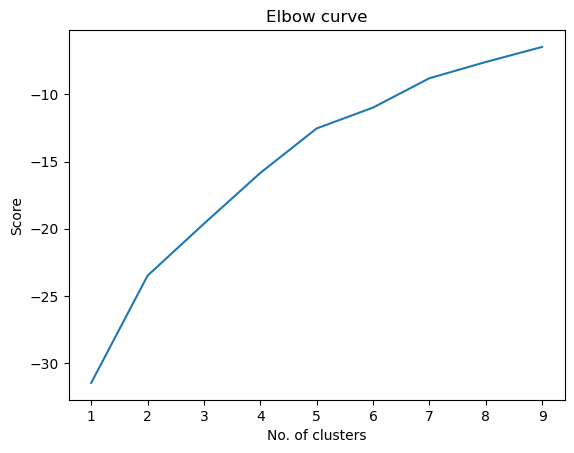

In [70]:
# Plot elbow curve
# Create plot
pl.plot(num_cl3, score3)

# Add axis label and title
pl.title('Elbow curve')
pl.xlabel('No. of clusters')
pl.ylabel('Score')

The number of clusters will be set to 5.

In [71]:
# Create k-means object
kmeans = KMeans(n_clusters=5)

# Fit k-means object to dataframe
kmeans.fit(df_norm3)

KMeans(n_clusters=5)

In [72]:
# Create new column indicating cluster
df_norm3['cluster3'] = kmeans.fit_predict(df_norm3)

In [73]:
# Check addition of new column
df_norm3.head(5)

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,sale_price,cluster3
0,0.000048,0.0,0.000048,0.000017,0.000061,0.000186,0
1,0.000048,0.0,0.000048,0.000036,0.000152,0.000267,0
3,0.000048,0.0,0.000048,0.000038,0.000102,0.000216,0
5,0.000048,0.0,0.000048,0.000028,0.000217,0.000255,0
6,0.000048,0.0,0.000048,0.000029,0.000172,0.000221,0


In [74]:
# Count number of observations per cluster
df_norm3['cluster3'].value_counts()

0    1179284
3       2423
1         74
2          5
4          2
Name: cluster3, dtype: int64

In [76]:
# Drop observations with sale_price 0 from df
df = df[df['sale_price']!=0]

# Add column cluster 3 to df
# Extract cluster column
extracted_col3 = df_norm3['cluster3']

# Add extracted column to df
df = df.join(extracted_col3)

# Add column 'cluster3' to df_ownsh_transf
df_ownsh_transf.loc[df_ownsh_transf['sale_price']==0, 'cluster3'] = 'Ownership transfer'

# Concatenate df and df_ownsh_transf
list_restore_df = [df, df_ownsh_transf]
df_restored = pd.concat(list_restore_df)

# Print head of df_restored
df_restored.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,age_cluster,price_cluster,cluster3
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium-age building,price_class_1,0
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,medium-age building,price_class_1,0
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,new building,price_class_1,0
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,5999.0,3250.0,1989,1,A1,1050000.0,2022-08-31,nan,Staten Island,medium-age building,price_class_1,0
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,6200.0,2580.0,1975,1,A1,910000.0,2022-04-05,nan,Staten Island,new building,price_class_1,0


In [77]:
# Count number of observations per cluster
df_restored['cluster3'].value_counts()

0                     1179284
Ownership transfer     483934
3                        2423
1                          74
2                           5
4                           2
Name: cluster3, dtype: int64

# 08 Visualise clustered data III

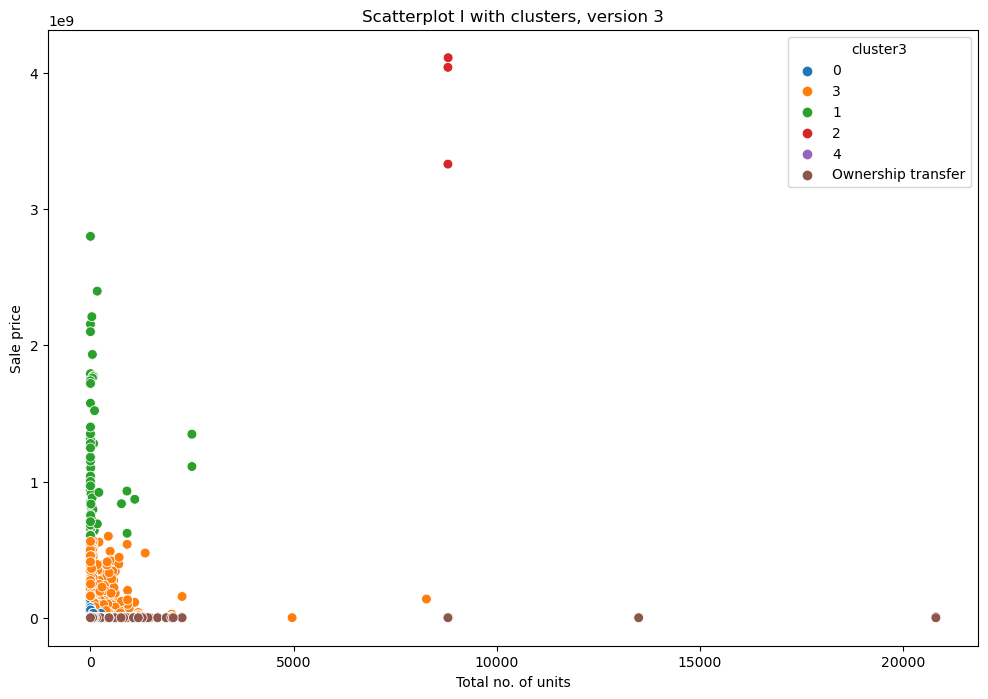

In [78]:
# Scatterplot of total_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['total_units'], y=df_restored['sale_price'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot I with clusters, version 3')
plt.xlabel('Total no. of units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_totunit-price-clust_V3.png')

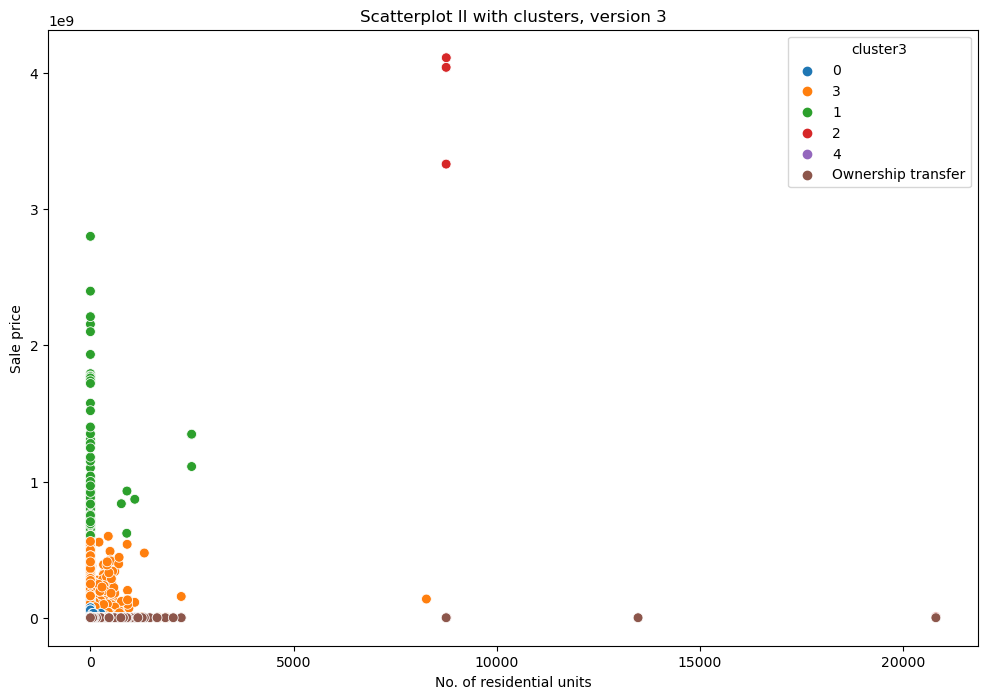

In [79]:
# Scatterplot of residential_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['residential_units'], y=df_restored['sale_price'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot II with clusters, version 3')
plt.xlabel('No. of residential units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_residunit-price-clust_V3.png')

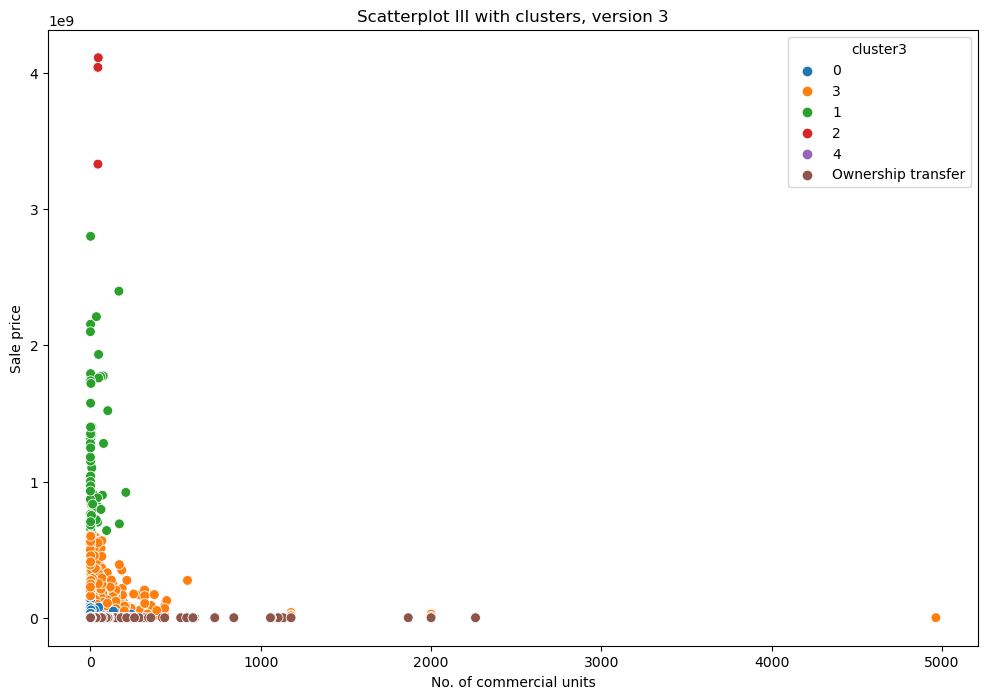

In [80]:
# Scatterplot of commercial_units and sale price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['commercial_units'], y=df_restored['sale_price'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot III with clusters, version 3')
plt.xlabel('No. of commercial units')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_communit-price-clust_V3.png')

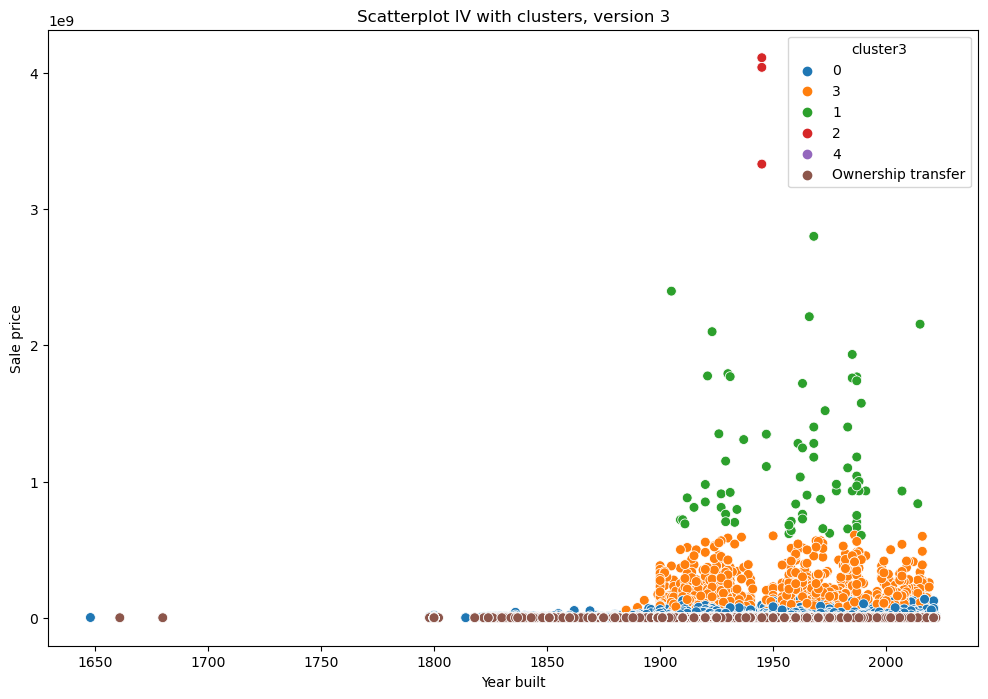

In [81]:
# Scatterplot of year_built and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['year_built'], y=df_restored['sale_price'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot IV with clusters, version 3')
plt.xlabel('Year built')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_year-price-clust_V3.png')

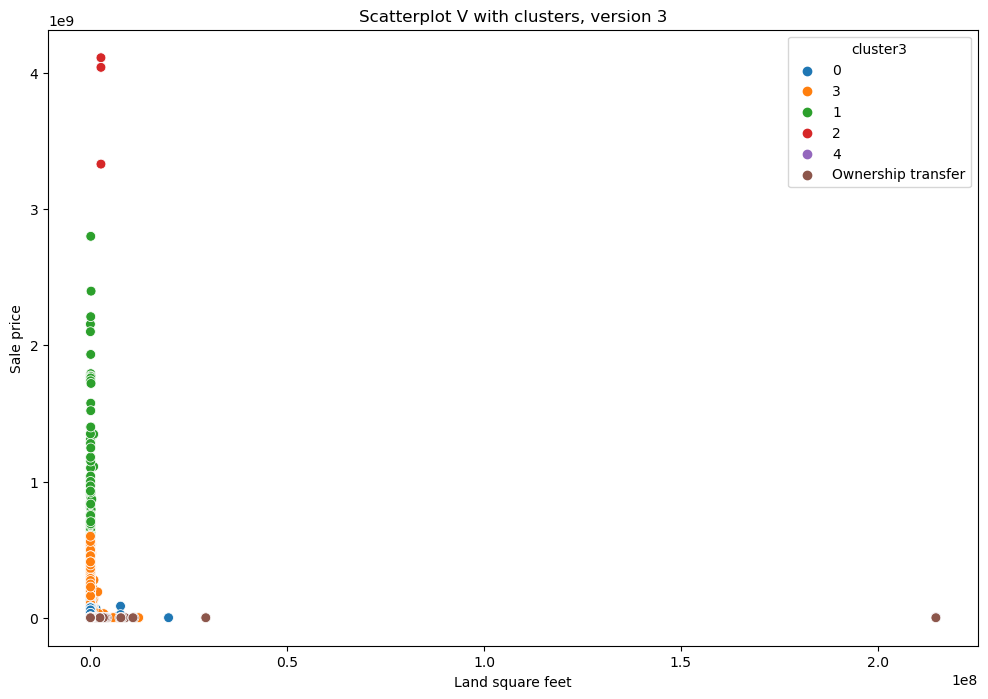

In [82]:
# Scatterplot with land_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['land_square_feet'], y=df_restored['sale_price'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot V with clusters, version 3')
plt.xlabel('Land square feet')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_ldsqft-price-clust_V3.png')

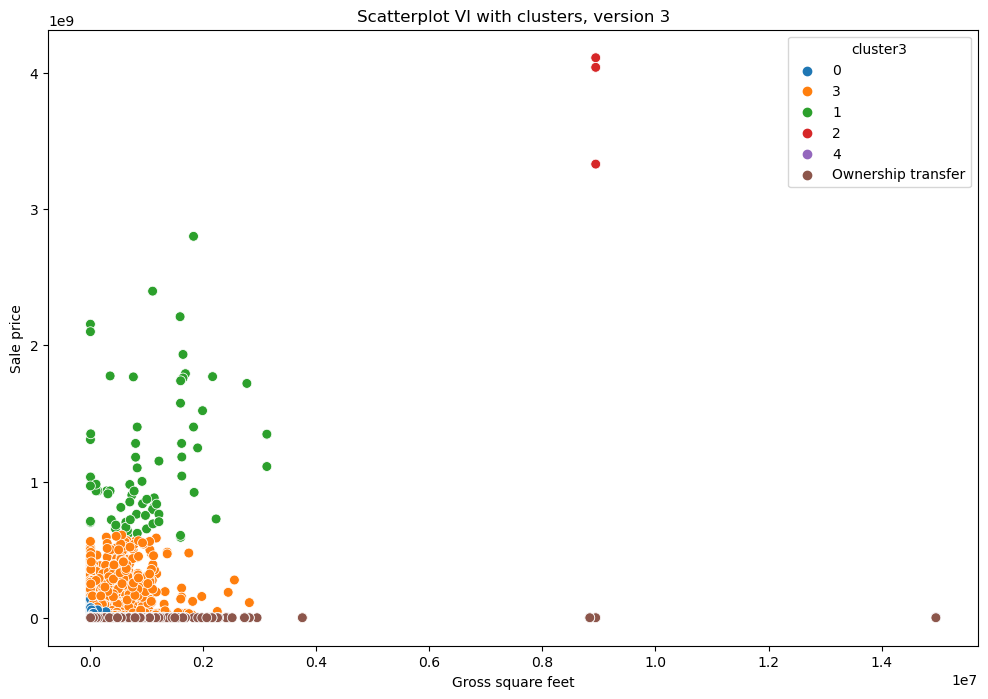

In [83]:
# Scatterplot with gross_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['gross_square_feet'], y=df_restored['sale_price'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VI with clusters, version 3')
plt.xlabel('Gross square feet')
plt.ylabel('Sale price')

# Save visual
plt.savefig('2023-06-18_scatter_grsqft-price-clust_V3.png')

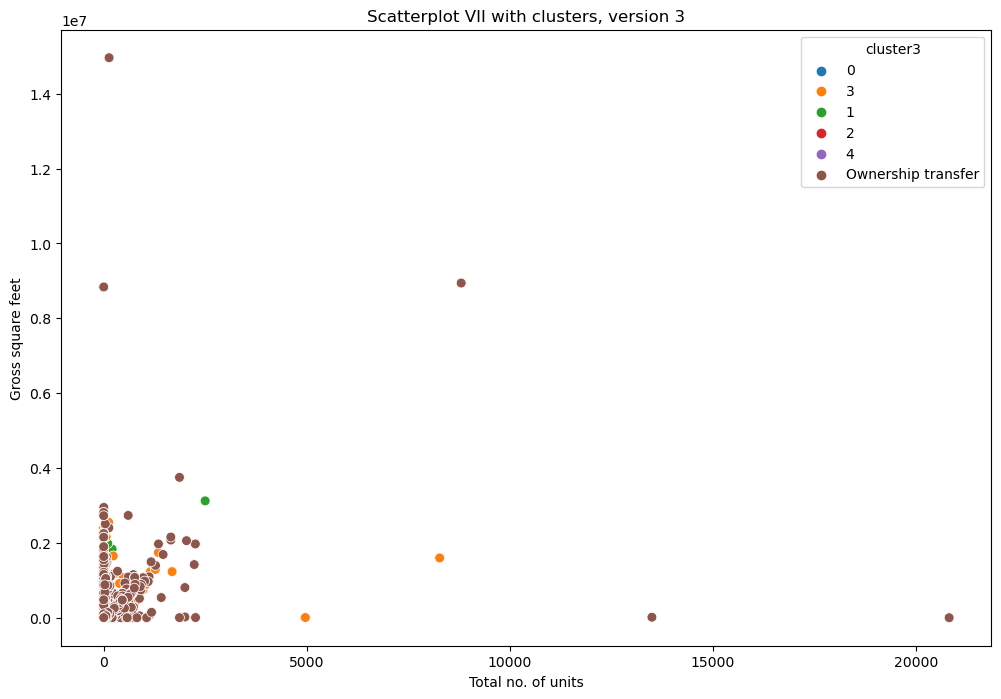

In [84]:
# Scatterplot with total_units and gross_square_feet
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_restored['total_units'], y=df_restored['gross_square_feet'], hue=df_restored['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VII with clusters, version 3')
plt.xlabel('Total no. of units')
plt.ylabel('Gross square feet')

# Save visual
plt.savefig('2023-06-18_scatter_totunit-grsqft-clust_V3.png')

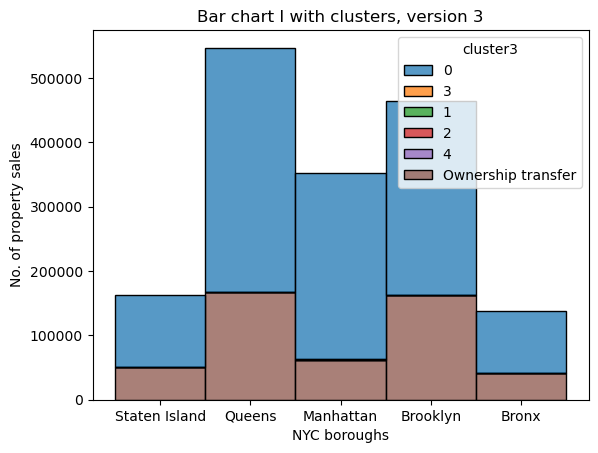

In [85]:
# Bar chart of properties per borough and cluster
# Create chart
sns.histplot(df_restored, x='borough_name', hue='cluster3', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart I with clusters, version 3')
plt.xlabel('NYC boroughs')
plt.ylabel('No. of property sales')

# Save visual
plt.savefig('2023-06-18_bar_borough-clust_V3.png')

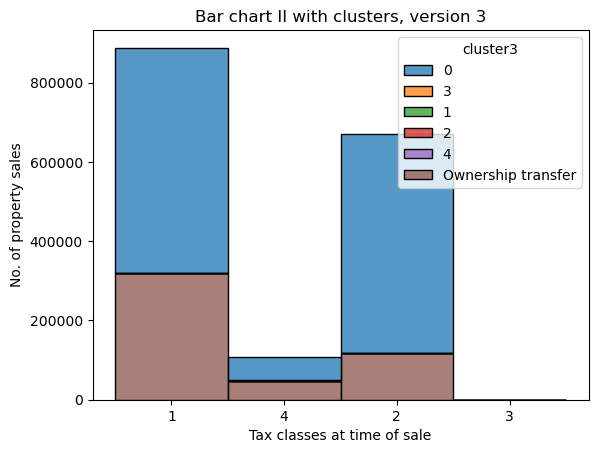

In [86]:
# Bar chart of properties per tax_class_at_sale and cluster
# Create chart
sns.histplot(df_restored, x='tax_class_at_time_of_sale', hue='cluster3', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart II with clusters, version 3')
plt.xlabel('Tax classes at time of sale')
plt.ylabel('No. of property sales')

# Save visual
plt.savefig('2023-06-18_bar_taxcl-clust_V3.png')

Re-running the k-means algorithm a thrid time allows to not only cluster observations according to sale price, but also taking into consideration ownership transfers. However, the size of the clusters continue to differ greatly from one another, ranging from 2 observations from cluster 4 to 1179284 observations for cluster 0 transfers. This again renders the stacke bar charts I and II useless. Moreover, clusters 2 and 4 with 5 and 2 observations respectively cannot even be spotted in the scatterplots as they are overlaid by observations from other clusters. Therefore, in addition to calculating descriptive statistics for all clusters, dataframes with the observations for clusters 2 and 4 will be printed below.

In [88]:
# Print observations for cluster 2
df_restored[df_restored['cluster3']==2]

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,age_cluster,price_cluster,cluster3
210941,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,NaN,D7,8764,48,8812,2675000.0,8942176.0,1945,2,D7,6.000000e+05,2020-01-07,nan,Manhattan,new building,price_class_2,2
536106,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,NaN,D7,8759,46,8805,2675000.0,8942176.0,1945,2,D7,4.111112e+09,2015-12-18,nan,Manhattan,new building,price_class_2,2
625791,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,NaN,D7,8756,44,8800,2675000.0,8942176.0,1945,2,D7,3.330133e+09,2014-06-03,nan,Manhattan,new building,price_class_2,2
1551526,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,NaN,D7,8756,44,8800,2675000.0,8942176.0,1945,2,D7,4.040527e+09,2006-11-17,nan,Manhattan,new building,price_class_2,2
1692374,3,DOWNTOWN-METROTECH,30 WAREHOUSES,4,NaN,V1,20811,0,20811,5820.0,0.0,2007,4,E9,6.500000e+06,2005-02-28,nan,Brooklyn,medium-age building,price_class_2,2


In [89]:
# Print observations for cluster 4
df_restored[df_restored['cluster3']==4]

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,age_cluster,price_cluster,cluster3
1386954,4,AIRPORT JFK,39 TRANSPORTATION FACILITIES,4,NaN,T1,0,133,133,214755710.0,14962152.0,1994,4,T1,3834460.0,2006-06-30,nan,Queens,medium-age building,price_class_3,4
1386956,4,AIRPORT JFK,39 TRANSPORTATION FACILITIES,4,NaN,T1,0,133,133,214755710.0,14962152.0,1994,4,T1,2254244.0,2006-06-28,nan,Queens,medium-age building,price_class_3,4


In [90]:
# Calculating descriptive statistics for clusters
df_restored.groupby('cluster3').agg({'residential_units': ['min', 'max', 'mean', 'median'], 'commercial_units': ['min', 'max', 'mean', 'median'], 'total_units': ['min', 'max', 'mean', 'median'], 'land_square_feet': ['min', 'max', 'mean', 'median'], 'gross_square_feet': ['min', 'max', 'mean', 'median'], 'year_built': ['min', 'max', 'mean', 'median'], 'sale_price': ['min', 'max', 'mean', 'median']})

residential_units                               \
                                 min    max          mean  median   
cluster3                                                            
0                                  0    416      1.814016     1.0   
1                                  0   2491    150.297297     0.0   
2                               8756  20811  11169.200000  8759.0   
3                                  0   8270    203.377631    60.0   
4                                  0      0      0.000000     0.0   
Ownership transfer                 0  20811      3.062075     1.0   

                   commercial_units                          total_units  \
                                min   max        mean median         min   
cluster3                                                                   
0                                 0   427    0.134939    0.0           0   
1                                 0   208   21.121622    1.0           0   
2                                 0    48   36.400000   44.0        8800   
3                                 0  4964   29.008667    1.0           0   
4                               133   133  133.000000  133.0         133   
Ownership transfer                0  2261    0.349190    0.0           0   

                                                land_square_feet               \
                      max          mean  median              min          max   
cluster3                                                                        
0                     427      1.955180     1.0              0.0   19850400.0   
1                    2498    171.418919     3.5              0.0     828650.0   
2                   20811  11205.600000  8805.0           5820.0    2675000.0   
3                    8271    232.402806   192.0              0.0   12253428.0   
4                     133    133.000000   133.0      214755710.0  214755710.0   
Ownership transfer  20811      3.426649     2.0              0.0  214755710.0   

                                              gross_square_feet              \
                            mean       median               min         max   
cluster3                                                                      
0                   2.436941e+03       1975.0               0.0    422000.0   
1                   9.015778e+04      49498.0               0.0   3122165.0   
2                   2.141164e+06    2675000.0               0.0   8942176.0   
3                   3.034006e+05      21474.0               0.0   3750565.0   
4                   2.147557e+08  214755710.0        14962152.0  14962152.0   
Ownership transfer  4.390190e+03       2328.0               0.0  14962152.0   

                                             year_built                     \
                            mean      median        min   max         mean   
cluster3                                                                     
0                   2.929998e+03      1346.0       1648  2022  1949.776077   
1                   1.013601e+06    828355.0       1905  2015  1960.540541   
2                   7.153741e+06   8942176.0       1945  2007  1957.400000   
3                   4.153323e+05    356786.0       1885  2020  1970.921998   
4                   1.496215e+07  14962152.0       1994  1994  1994.000000   
Ownership transfer  5.194511e+03      1942.0       1661  2022  1946.017436   

                             sale_price                              \
                    median          min           max          mean   
cluster3                                                              
0                   1945.0          1.0  1.356350e+08  1.054913e+06   
1                   1964.0  590333250.0  2.800000e+09  1.125845e+09   
2                   1945.0     600000.0  4.111112e+09  2.297774e+09   
3                   1970.0          1.0  6.067850e+08  9.628290e+07   
4                   1994.0    2254244.0  3.834460e+06  3.044352e+06   

The visualisations show that the clusters become most visible when observations are grouped according to sale price. 

Looking at mean and median of sale_price for the clusters, the clusters can be ranked as follows (highest to lowest prices): 2, 1, 3, 4, 0, ownership transfers.

The column 'price_cluster' created in the previous k-means clustering process can therefore be dropped and the column 'cluster3' created in this k-means clustering process be adapted as follows:
column name: 'price_cluster'
values:
2 - very high-priced
1 - high-priced
3 - medium priced
4 - low-priced
0 - very low-priced
ownership transfer - remains unchanged

In [91]:
# Drop column price_cluster
df_restored = df_restored.drop(columns= ['price_cluster'])

In [92]:
# Rename column 'cluster3'
df_restored.rename(columns= {'cluster3' : 'price_cluster'}, inplace=True)

In [93]:
# Replace cluster numbers with names 
df_restored.loc[df_restored['price_cluster'] ==0, 'price_cluster'] = 'very low-priced'
df_restored.loc[df_restored['price_cluster'] ==1, 'price_cluster'] = 'high-priced'
df_restored.loc[df_restored['price_cluster'] ==2, 'price_cluster'] = 'very high-priced'
df_restored.loc[df_restored['price_cluster'] ==3, 'price_cluster'] = 'medium priced'
df_restored.loc[df_restored['price_cluster'] ==4, 'price_cluster'] = 'low-priced'

In [94]:
# Check df
df_restored.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,age_cluster,price_cluster
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium-age building,very low-priced
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,medium-age building,very low-priced
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,new building,very low-priced
5,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,5999.0,3250.0,1989,1,A1,1050000.0,2022-08-31,nan,Staten Island,medium-age building,very low-priced
6,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,6200.0,2580.0,1975,1,A1,910000.0,2022-04-05,nan,Staten Island,new building,very low-priced


In [95]:
# Check price categories
df_restored['price_cluster'].value_counts()

very low-priced       1179284
Ownership transfer     483934
medium priced            2423
high-priced                74
very high-priced            5
low-priced                  2
Name: price_cluster, dtype: int64

# 09 Export dataframe

In [96]:
# Export dataframe
df_restored.to_pickle(os.path.join(path, '2023-06-18_df.pkl'))